In [10]:
import pandas as pd 
import numpy as np
import sys
import matplotlib.pyplot as plt

In [3]:
#read the data
data = pd.read_csv('amazon.csv',thousands='.')

In [4]:
#view the data
sample = data.head()

In [33]:
#get data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    6454 non-null   int64 
 1   state   6454 non-null   object
 2   month   6454 non-null   object
 3   number  6454 non-null   int64 
 4   date    6454 non-null   object
dtypes: int64(2), object(3)
memory usage: 252.2+ KB


In [35]:
#check null values
missing = data.isna().sum()
missing

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [40]:
months = data['month'].unique()
columns = data.columns
columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [75]:
#check whether there is a zero val in the number
(data.number == 0).sum()#no zeros
(data.number!=0).sum()
data.shape #shape is same ,so no zeros

(5837, 5)

In [99]:
#forest fire per month
group1 = data.groupby('month')
forestFirePerMonth = group1.agg({'number':['sum','mean','std']})
forestFirePerMonth #an aggregate of forest fires per month
forestFirePerMonth
#reseting index of month
forestFirePerMonth.reset_index(level=0, inplace=True)
forestFirePerMonth

month   number                          
                   sum         mean          std
0       Abril    28364    61.795207   114.454628
1      Agosto   740841  1435.738372  2624.370054
2    Dezembro   152596   316.589212   698.618817
3   Fevereiro    30952    65.025210   107.324473
4     Janeiro    52587   110.943038   185.320244
5       Julho   217620   454.321503   920.288035
6       Junho   111405   238.554604   767.057794
7        Maio    46083   105.694954   252.194344
8       Mar�o    35118    75.522581   149.345671
9    Novembro   312326   600.626923  1333.993478
10    Outubro   629665  1179.147940  1771.347862
11   Setembro  1015925  1920.463138  3400.552737

In [8]:
grp1 = data.groupby('month')
months = []
sums = []

for name,group in grp1:
    months.append(name)
    groups = grp1.get_group(name)
    sums.append(groups['number'].aggregate(np.sum))

print(months)
print(sums)  

['Abril', 'Agosto', 'Dezembro', 'Fevereiro', 'Janeiro', 'Julho', 'Junho', 'Maio', 'Mar�o', 'Novembro', 'Outubro', 'Setembro']
[28364, 740841, 152596, 30952, 52587, 217620, 111405, 46083, 35118, 312326, 629665, 1015925]


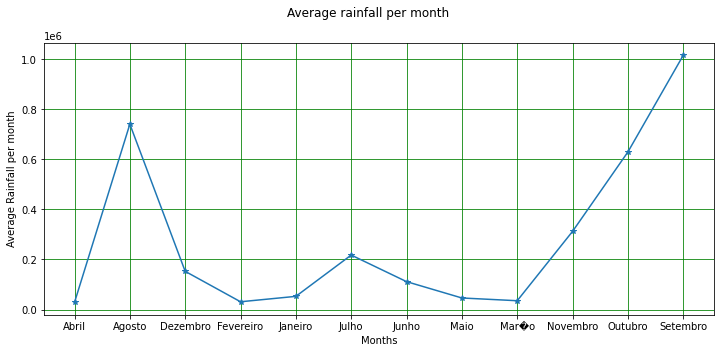

In [11]:
plt.figure(figsize = (12,5))
plt.xlabel('Months', fontsize=10)
plt.ylabel('Average Rainfall per month',fontsize=10)
plt.suptitle('Average rainfall per month')
plt.grid(color='green')
plt.plot(months,sums, marker = '*')

<BarContainer object of 12 artists>

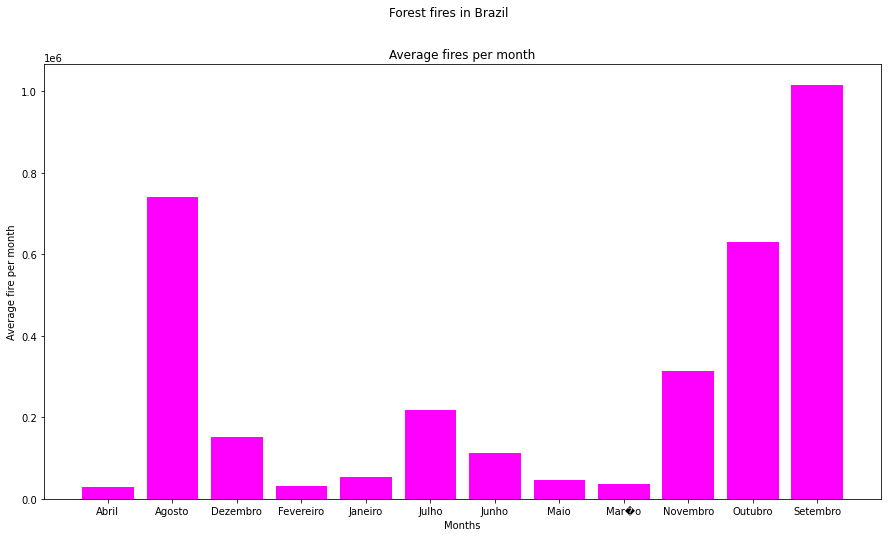

In [12]:
plt.figure(figsize = (15,8))
plt.xlabel('Months', fontsize=10)
plt.ylabel('Average fire per month',fontsize=10)
plt.suptitle('Forest fires in Brazil')
plt.title('Average fires per month')
plt.bar(months,sums, color = 'magenta')